<a href="https://colab.research.google.com/github/harishjungshahi/Deep-Learning/blob/main/Handwritten_Digits_Classification_Using_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Codebasics DL Course: Handwritten Digits Classification Using Multilayer Perceptron</h2>



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

from matplotlib import pyplot as plt

In [3]:
# Load the MINST DATASET
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 129MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 18.1MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 33.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.19MB/s]


In [4]:
len(train_dataset), len(test_dataset)

(60000, 10000)

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=True)

data_iter = iter(train_loader)
images, labels = next(data_iter)

In [6]:
images.shape, labels.shape

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

In [7]:
images[0].squeeze().shape

torch.Size([28, 28])

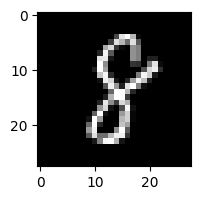

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(images[4].squeeze(), cmap="gray")
plt.show()

In [9]:
labels[4]

tensor(8)

In [10]:
class DigitClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,10)
        )

    def forward(self, x):
            return self.network(x)

In [11]:
# Instantiate the Model, define loss function and optimizer
model = DigitClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()          # Zero the gradient
        outputs = model(images)        # Forward Pass
        loss = criterion(outputs,labels)  # Compute Loss
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch[{epoch+1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}")

Epoch[1/5], Loss: 0.4117
Epoch[2/5], Loss: 0.2018
Epoch[3/5], Loss: 0.1479
Epoch[4/5], Loss: 0.1185
Epoch[5/5], Loss: 0.1020


In [12]:
# Testing the model
model.eval() #Switch to evaluation mode
correct = 0
total = 0
with  torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total:.2f}%")

Accuracy: 96.47%


### Classification Report & Confusion Matrix

In [13]:
# Testing the model
model.eval() # switch to evaluation mode
all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        # Append label and predictions to to lists
        all_predicted.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

In [14]:
len(all_predicted)

10000

In [15]:
from sklearn.metrics import classification_report
report = classification_report(all_labels, all_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.96      0.95      0.96       982
           5       0.99      0.94      0.96       892
           6       0.98      0.96      0.97       958
           7       0.94      0.98      0.96      1028
           8       0.97      0.95      0.96       974
           9       0.94      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.97      0.96      0.96     10000
weighted avg       0.97      0.96      0.96     10000



In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_predicted)
cm

array([[ 974,    0,    0,    0,    0,    1,    1,    1,    1,    2],
       [   0, 1126,    4,    1,    0,    0,    1,    0,    3,    0],
       [   4,    0, 1001,    2,    6,    0,    2,   15,    2,    0],
       [   0,    0,    7,  971,    1,    5,    0,   14,    5,    7],
       [   3,    2,    4,    0,  931,    0,    2,    4,    2,   34],
       [   6,    2,    4,   16,    2,  839,    5,    4,    6,    8],
       [  10,    4,    5,    1,   10,    3,  918,    1,    6,    0],
       [   1,    8,    8,    1,    0,    0,    0, 1007,    0,    3],
       [   5,    2,    7,   12,    6,    1,    3,   10,  923,    5],
       [   5,    8,    1,    7,   11,    0,    0,   20,    0,  957]])

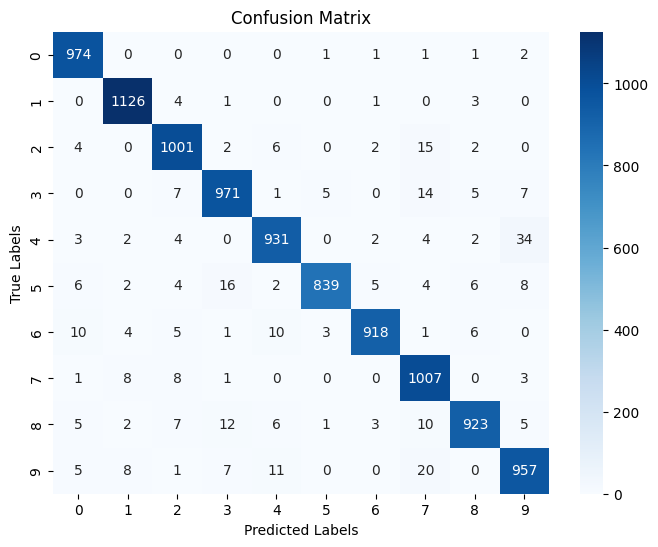

In [17]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(cm)), yticklabels=range(len(cm)))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()